In [1]:
# Reading: chatper 8 (mathmatical bg)

# Construct a decision tree for certain predictable things (such as. whether a friend will come to play baseball with 
# me will depend on a lot of factors)

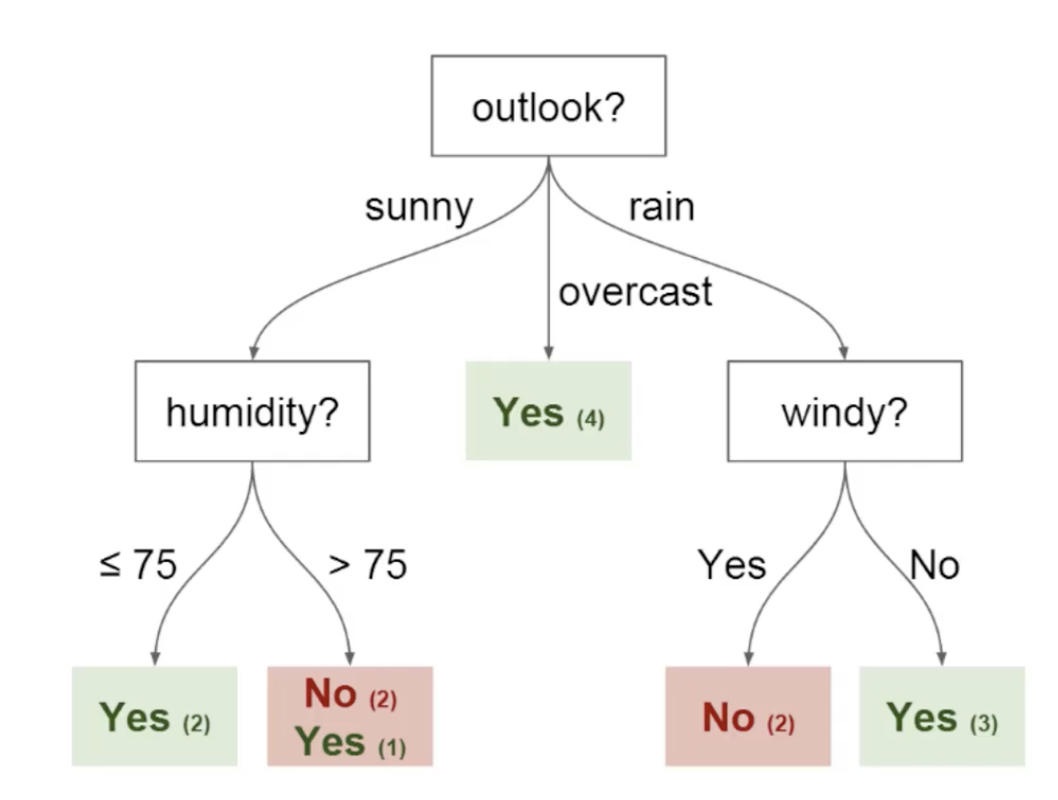
### Decision Tree
#### Nodes: split the value for a certain attribute
#### Edges: outcomes of a split to next node
#### Root: the node that performs the first split
#### Leaves: terminal node that predict the outcome


<hr>

#### At each node, we will consider:

##### What feature will allow me to split the observations at hand in a way that the resulting groups are as different from each other as possible (and the members of each resulting subgroup are as similar to each other as possible)?


In [2]:
# However, we have to choose the splits. The mathmatical method we use is: Entropy and Information Gain 
#  to choose the best split. (maximize the information gain off the split)


### Random Forest - To improve performance off a single decision tree
* Weakness of decision tree
    * don't tend to have the best predictive accuracy
    * this is partially due to the high variance meaning that different splits in the training data can lead to very different trees
    
    
* Bagging is a way to reduce variance of the model and random forest is how it's utilized (or, a small variance of it). (**bagged trees is aka. bootstrap sampling**)


* To improve model performance, we can use many trees with a random sample of features chosen as the split
    * A new random sample of features is chosen for **every single tree at every single split** 
    * For classification, m is typically chosen to be the best squre root of p
    
### Why using Random Forest?
* Suppose there's a very strong feature in the dataset. When using 'bagged' trees, most of the trees will use that feature as the top split, resulting a ensemble of similar trees that are highly correlated.
* Averaging highly correlated quantities does not significantly reduce variance. 
* By randomly leaving out candidate features from each split, **random forests 'decorrelates' the trees** (meaning making the trees in the pendant of each other) such that the averaging process can reduce the variance of the resulting model.
* **So we won't be affected by features that really strongly predict declasse data.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


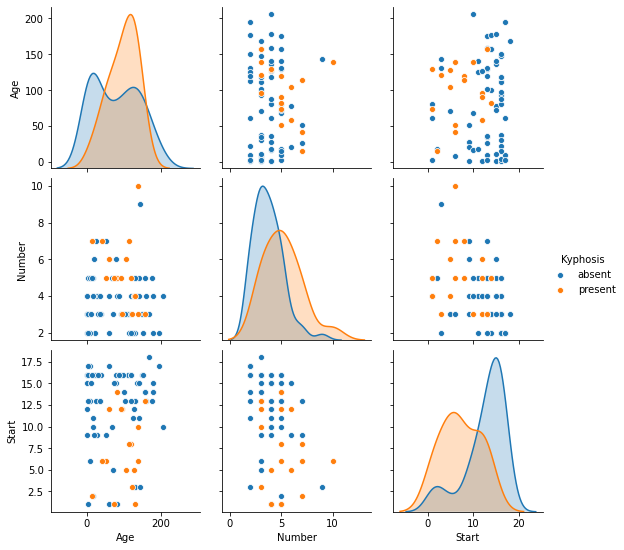

In [6]:
sns.pairplot(df, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('Kyphosis', axis=1)

In [10]:
y = df['Kyphosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dtree = DecisionTreeClassifier()

In [14]:
dtree.fit(X_train, y_prain)

DecisionTreeClassifier()

In [24]:
pred = dtree.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  4]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.81      0.81      0.81        21
     present       0.33      0.33      0.33         6

    accuracy                           0.70        27
   macro avg       0.57      0.57      0.57        27
weighted avg       0.70      0.70      0.70        27



In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[19  2]
 [ 4  2]]
              precision    recall  f1-score   support

      absent       0.83      0.90      0.86        21
     present       0.50      0.33      0.40         6

    accuracy                           0.78        27
   macro avg       0.66      0.62      0.63        27
weighted avg       0.75      0.78      0.76        27



In [35]:
df['Kyphosis'].value_counts()
# A lot absent and a few 17, thus the instances are unbalanced

absent     64
present    17
Name: Kyphosis, dtype: int64

In [ ]:
# End
# RandomForest model is a very popular model in machine learning. Usually data scientists first try this model besides
#  others, just to see the baseline of accuracy/precision/recall you can get.